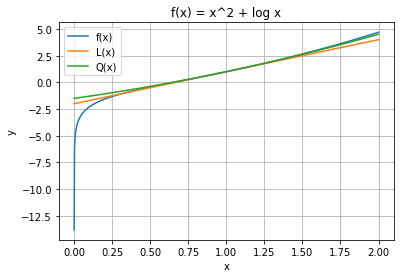

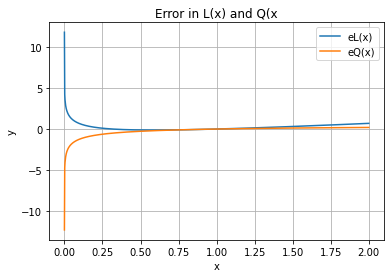

In [16]:
#Q1
import matplotlib.pyplot as plt
import numpy as np
#Defining f(x)
def f(x):
    return x*x + np.log(x)
#Defining L(x) Linear Approximation
def L(x):
  return 3*x-2
#Defining f(x) Quadratic Approximation
def Q(x):
  return x*x/2 + 2*x -(3/2)

t = np.linspace(0.000001,2,1000) # defining the range for values of x
def eL(x):
  #defining Linear Approximation
  return (f(x)-L(x))/(x-1)
def eQ(x):
  #defining Quadratic Approximation
  return (f(x)-Q(x))/((x-1)**2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x) = x^2 + log x")
plt.grid()
plt.plot(t,f(t),label='f(x)')
plt.plot(t,L(t),label='L(x)')#plotting f,L,Q
plt.plot(t,Q(t),label='Q(x)')
plt.legend()
plt.show()


plt.xlabel("x")
plt.ylabel("y")
plt.title("Error in L(x) and Q(x")
plt.grid()
plt.plot(t,eL(t),label='eL(x)')
plt.plot(t,eQ(t),label='eQ(x)')#plotting Error in L and Q
plt.legend()
plt.show()


In [17]:
#Q2
from numpy.core.memmap import dtype
import numpy as np
import numdifftools as nd
import math
def f(x):
    x1, x2 = x
    return (x1**2 - 3 * x2**2)**2 + (np.sin(x1**2 + x2**2))**2

def gradX(x, y):
    grad_x = 4 * x * (x**2 - 3 * y**2) + 4*x*np.sin(x**2 + y**2)*np.cos(x**2 +y**2)
    return grad_x
def gradY(x, y):
    grad_y = -12 * y * (x**2 - 3 * y**2) + 4*y*np.sin(x**2 + y**2)*np.cos(x**2 + y**2)
    return grad_y

x0 = [1, 1] # Initial guess for the minimum
Hfun = nd.Hessian(f) # Define a Hessian function using numdifftools
H = Hfun(x0) # Evaluate the Hessian matrix at the initial guess

print("The Hessian matrix at x0 =", x0, "is:")
print(H)
def comb_grad(x0,y0, max_iter = 5000):
    x, y = x0, y0
    i=0
    while (math.sqrt(gradX(x,y)**2 + gradY(x,y)**2) >0.0000000001):#tolerance = 0.000001 (can be changed)
      # grad_x = gradX(x,y)
      # grad_y = gradY(x,y)
      l0 = [x,y]
      H = nd.Hessian(f)
      M = H(l0)#Hessian matrix at x0,y0
      if(i>=max_iter):
        break
      det_m = M[0][0]*M[1][1] - M[0][1]*M[1][0]#Determinant of Hessian Matrix at x0,y0

      if(M[0][0]>0 and det_m>0):#condition for positive definite
        F = [[-gradX(x,y)], [-gradY(x,y)]]
        Hinv = np.linalg.inv(M) #inverse of Hessian matrix
        d = np.matmul(Hinv,F)#Multiplication of Inverse of hessian matrix and -Gradf(x)
        dx = d[0][0]#descent direction for x
        dy = d[1][0]#descent direction for y
      else:
        d = [[-gradX(x,y)], [-gradY(x,y)]]
        dx = d[0][0]
        dy = d[1][0]
      D = [[-gradX(x,y), -gradY(x,y)]]
      d = [[dx],[dy]]
      learning_rate = 1#implementing line subroutint with t as learning_rate
      while (f([x,y])-f([x+learning_rate*dx,y+learning_rate*dy])<0.499*(np.dot(D,[[learning_rate*dx],[learning_rate*dy]]))):
        learning_rate = 0.001*learning_rate#choosing alpha = 0.499, beta = 0.001
      x = x + learning_rate*dx
      y = y + learning_rate*dy#updating x and y
      i+=1
      print([x,y])

    return x,y
xmin,ymin = comb_grad(1,1)
print(f"Minimum value of x is: {xmin}")
print(f"Minimum value of y is: {ymin}")
val = f([xmin,ymin])
print(f"Minimum value of function is : {val}")#calling function and printing min x,y and minimum value

The Hessian matrix at x0 = [1, 1] is:
[[ -6.74275396 -29.22914897]
 [-29.22914897  89.25724604]]
[1.009513604990616, 0.9775136049906159]
[1.0184329947162767, 0.9572552617681788]
[1.0268177691875007, 0.9389181766965038]
[1.034719648643898, 0.9222523288125141]
[1.042183769786581, 0.9070514081480725]
[1.049249738694775, 0.8931433061533532]
[1.0559524888839655, 0.8803830553053752]
[1.062322983679595, 0.8686474963047722]
[1.0683887940894552, 0.8578311885249893]
[1.0741745768235456, 0.8478432311924593]
[1.0797024719038248, 0.8386047623642446]
[1.0849924352123828, 0.8300469695672238]
[1.0900625181267356, 0.822109491670693]
[1.094929103894424, 0.814739123409582]
[1.0996071084496466, 0.80788875652785]
[1.1041101518486611, 0.8015165077219096]
[1.1084507053019301, 0.7955849953748076]
[1.1126402178353814, 0.7900607357851153]
[1.116689225863823, 0.7849136360964979]
[1.1206074483629187, 0.7801165660374688]
[1.1244038698487453, 0.7756449943152591]
[1.1280868129901214, 0.7714766783777864]
[1.131664002

In [18]:
#Q3
import numpy as np
import numdifftools as nd
import math
#defining g1(x)
def g1(x):
    x1,x2 = x
    return 2*x2-x1
#defining g2(x)
def g2(x):
    x1,x2 = x
    return 2*x1-x2
#defining g3(x)
def g3(x):
    x1,x2 = x
    return 1-x1-x2
#defining Ψ(x) as given in the Question
def Ψ(x):
    return np.log(1/(g1(x)*g2(x)*g3(x)))
#defining partial derivative w.r.t to x
def gradX(x, y):
    grad_x = -(6*x*x-6*y*x-4*x-3*y*y+5*y)/((2*y-x)*(2*x-y)*(1-x-y))
    return grad_x
#defining partial derivative w.r.t to x
def gradY(x, y):
    grad_y = -(6*y*y-6*x*y-4*y-3*x*x+5*x)/((2*y-x)*(2*x-y)*(1-x-y))
    return grad_y

def comb_grad(x0,y0, max_iter = 5000):
    x, y = x0, y0
    i=0
    while (math.sqrt(gradX(x,y)**2 + gradY(x,y)**2) >0.000001):
      # grad_x = gradX(x,y)
      # grad_y = gradY(x,y)
      l0 = [x,y]
      H = nd.Hessian(Ψ)
      M = H(l0)#Hessian matrix at x0,y0
      if(i>=max_iter):
        break
      det_m = M[0][0]*M[1][1] - M[0][1]*M[1][0]#Determinant of Hessian Matrix at x0,y0

      if(M[0][0]>0 and det_m>0):#condition for positive definite
        F = [[-gradX(x,y)], [-gradY(x,y)]]#computing -Gradf(x)
        Hinv = np.linalg.inv(M)#inverse of hessian matrix
        d = np.matmul(Hinv,F)#multiplication of inverse of hessian and -Gradf(x)
        dx = d[0][0]#descent direction for x
        dy = d[1][0]#descent direction for y
      else:
        d = [[-gradX(x,y)], [-gradY(x,y)]]
        dx = d[0][0]
        dy = d[1][0]
      D = [[-gradX(x,y), -gradY(x,y)]]
      d = [[dx],[dy]]
      learning_rate = 1 #implementing line subroutint with t as learning_rate
      while (Ψ([x,y])-Ψ([x+learning_rate*dx,y+learning_rate*dy])<0.499*(np.dot(D,[[learning_rate*dx],[learning_rate*dy]]))):
        learning_rate = 0.001*learning_rate#choosing alpha = 0.499 and beta  = 0.001
      x = x + learning_rate*dx
      y = y + learning_rate*dy#updating x and y
      i+=1
      print([x,y])

    return x,y
xmin,ymin = comb_grad(0.25,0.25)
print(f"Minimum value of x is: {xmin}")
print(f"Minimum value of y is: {ymin}")
val = (Ψ([xmin,ymin]))
print(f"Minimum value of function is : {val}")#calling function and printing the min x,y and minimum value of the function

[0.3333333330406191, 0.3333333330406191]
Minimum value of x is: 0.3333333330406191
Minimum value of y is: 0.3333333330406191
Minimum value of function is : 3.295836866004329
